# Mulitlayer perceptrin (MLP)

In [85]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

df = sns.load_dataset("mpg").drop("name", axis=1)
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
5,15.0,8,429.0,198.0,4341,10.0,70,usa
6,14.0,8,454.0,220.0,4354,9.0,70,usa
7,14.0,8,440.0,215.0,4312,8.5,70,usa
8,14.0,8,455.0,225.0,4425,10.0,70,usa
9,15.0,8,390.0,190.0,3850,8.5,70,usa


In [86]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [88]:
df.query("horsepower.isna()")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [89]:
from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=2)
X = df["horsepower"].values.reshape(-1,1)
full_horsepower = impute_knn.fit_transform(X)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [90]:
df["horsepower"] = full_horsepower

In [91]:
df.iloc[[32,126,330,336,354,374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,104.469388,2046,19.0,71,usa
126,21.0,6,200.0,104.469388,2875,17.0,74,usa
330,40.9,4,85.0,104.469388,1835,17.3,80,europe
336,23.6,4,140.0,104.469388,2905,14.3,80,usa
354,34.5,4,100.0,104.469388,2320,15.8,81,europe
374,23.0,4,151.0,104.469388,3035,20.5,82,usa


<AxesSubplot:>

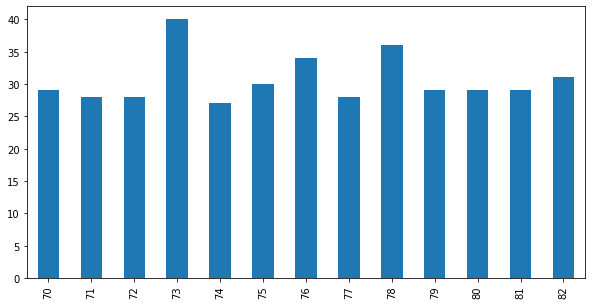

In [92]:
plt.figure(figsize=(10,5))
df["model_year"].value_counts().sort_index().plot(kind="bar")

## Train | Val | Test split 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X, y = df.drop(["mpg", "origin"], axis=1), df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val_train, X_validation, y_val_train, y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_validation = scaler.transform(X_validation)
scaled_X_val_train = scaler.transform(X_val_train)

print(scaled_X_train.shape, scaled_X_test.shape, scaled_X_validation.shape, scaled_X_val_train.shape)
scaled_X_train

(266, 6) (132, 6) (88, 6) (178, 6)


array([[-0.88046971, -1.08638601, -1.08060421, -1.08082999,  1.30170315,
         1.13011729],
       [ 0.30238354,  0.35105129, -0.39565708,  0.24102646,  0.5090323 ,
        -0.30136461],
       [-0.88046971, -0.80280994, -0.36825919, -0.51414857, -0.57188249,
        -0.87395737],
       ...,
       [-0.88046971, -0.60724024, -0.25866765, -0.59458851, -0.28363854,
         0.55752453],
       [-0.88046971, -1.04727207, -1.16279786, -1.15286576,  0.61712378,
         1.41641368],
       [-0.88046971, -0.96904419, -1.60116403, -1.27292538,  1.95025203,
        -0.87395737]])

In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

import tensorflow

optimizer_adam = tensorflow.keras.optimizers.Adam(0.001) # https://stackoverflow.com/questions/59737875/keras-change-learning-rate
optimizer_adam.learning_rate.assign(0.01)
gradient_decent = SGD(learning_rate = 0.01)

def MLP(optimizers):
    model = Sequential(name = "MLP_network")
    model.add(InputLayer(X_val_train.shape[1]))
    model.add(Dense(8, name = "Hidden1", activation = "relu"))
    model.add(Dense(8, name = "Hidden2", activation = "relu"))
    model.add(Dense(1, name = "Output"))

    model.compile(loss = "mean_squared_error", optimizer = optimizers)
    return model

model = MLP(optimizers = optimizer_adam)
model.summary()
model.fit(scaled_X_val_train, y_val_train, epochs=150, verbose=1, validation_data=(scaled_X_validation, y_validation))

Model: "MLP_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 8)                 56        
                                                                 
 Hidden2 (Dense)             (None, 8)                 72        
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
6/6 [==============================] - 1s 26ms/step - loss: 555.6725 - val_loss: 618.9332
Epoch 2/150
6/6 [==============================] - 0s 7ms/step - loss: 525.8244 - val_loss: 584.7510
Epoch 3/150
6/6 [==============================] - 0s 7ms/step - loss: 489.2148 - val_loss: 539.2924
Epoch 4/150
6/6 [

In [95]:
df_loss_adam = pd.DataFrame(model.history.history)
df_loss_adam.head()

,loss,val_loss
0,555.672546,618.933167
1,525.824402,584.750977
2,489.214844,539.292419
3,440.752319,475.120514
4,374.783081,388.016144


In [96]:
model = MLP(optimizers=gradient_decent)
model.summary()
model.fit(scaled_X_val_train, y_val_train, epochs=150, verbose=1, validation_data=(scaled_X_validation, y_validation))

Model: "MLP_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 8)                 56        
                                                                 
 Hidden2 (Dense)             (None, 8)                 72        
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
6/6 [==============================] - 0s 27ms/step - loss: 291.1495 - val_loss: 25.8718
Epoch 2/150
6/6 [==============================] - 0s 7ms/step - loss: 348.3656 - val_loss: 551.0369
Epoch 3/150
6/6 [==============================] - 0s 8ms/step - loss: 436.1862 - val_loss: 438.5351
Epoch 4/150
6/6 [=

In [97]:
df_loss_sgd = pd.DataFrame(model.history.history)
df_loss_sgd.head()

,loss,val_loss
0,291.149506,25.871794
1,348.365570,551.036865
2,436.186188,438.535065
3,294.220734,215.728653
4,111.092506,69.844734


<AxesSubplot:>

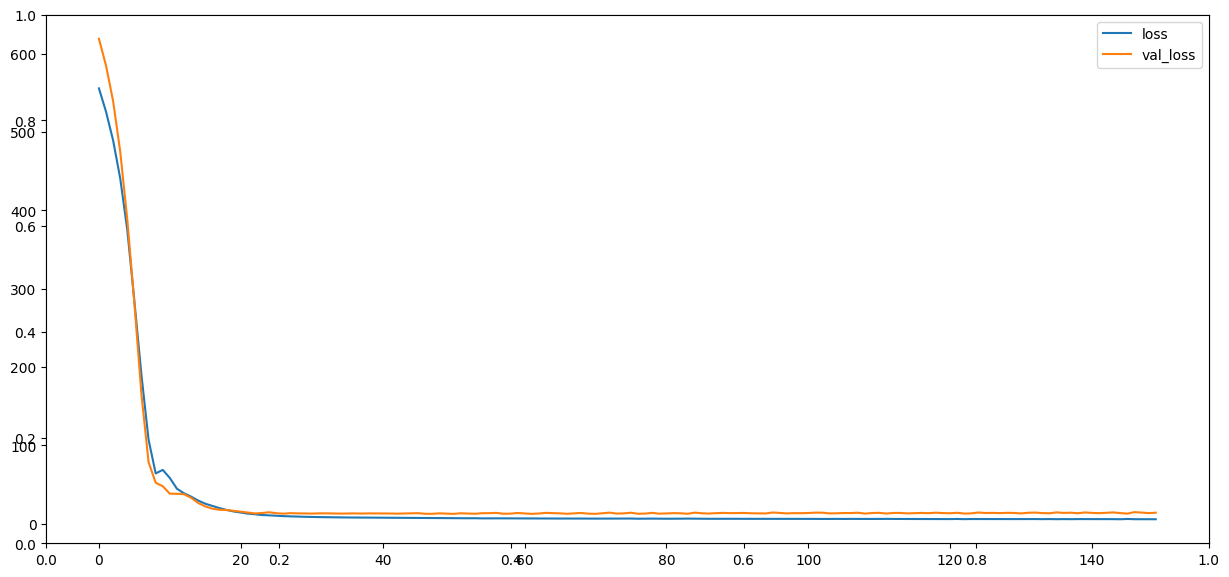

In [98]:
fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=100), plt.axes()
# df_loss_sgd.plot(ax=axes)
df_loss_adam.plot(ax=axes)

## Early stop
- 20 Epochs for Adam optimizer

In [99]:
model_adam = MLP(optimizers=optimizer_adam)
model_adam.summary()
model_adam.fit(scaled_X_train, y_train, epochs=20, verbose=1)

Model: "MLP_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 8)                 56        
                                                                 
 Hidden2 (Dense)             (None, 8)                 72        
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - 0s 2ms/step - loss: 514.2563
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 134.2435
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 67.8712
Epoch 4/20
9/9 [==============================] - 0s 2ms/step - loss: 46.6528
Epoch 5

## Prediction and evaluation

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model_adam.predict(scaled_X_test)

print("MSE and RMSE for the model")
print(mean_squared_error(y_test, y_pred), np.sqrt(mean_absolute_error(y_test, y_pred)))

MSE and RMSE for the model
6.3874207730146555 1.407821725345474


## Out performing random forest

In [101]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor() # 

rand_forest.fit(scaled_X_train, y_train)

y_pred_rf = rand_forest.predict(scaled_X_test)
print("MSE and RMSE for the model")
print(mean_squared_error(y_test, y_pred_rf), np.sqrt(mean_absolute_error(y_test, y_pred_rf)))

MSE and RMSE for the model
6.949387674242421 1.3806646401225924
